# Projeto de Curso - COE241 - Estat ıstica e Modelos Probabilísticos
Aluno: Zuilho Rodrigues Castro Segundo

DRE: 122064877

### Importando Bibliotecas

In [92]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

### Dataset e Pré-Processamento

In [93]:
chromecast_df = pd.read_csv('dataset_chromecast.csv')
smarttv_df = pd.read_csv('dataset_smart-tv.csv')

In [94]:
chromecast_df.head()

,device_id,date_hour,bytes_up,bytes_down
0,66161985,2021-09-06 00:01:00,2987.016393,49185.704918
1,66161985,2021-09-06 00:02:00,685.935484,328.258065
2,66161985,2021-09-06 00:03:00,4493.901639,37914.064516
3,66161985,2021-09-06 00:04:00,776.133333,229.200000
4,66161985,2021-09-06 00:05:00,3081.311475,51656.800000


In [95]:
smarttv_df.head()

,device_id,date_hour,bytes_up,bytes_down
0,77209603,2021-11-22 15:23:00,132932.983607,2.818140e+06
1,77209603,2021-11-22 15:24:00,115770.491803,2.264410e+06
2,77209603,2021-11-22 15:25:00,114030.032787,2.309270e+06
3,77209603,2021-11-22 15:26:00,97170.622951,2.006544e+06
4,77209603,2021-11-22 15:27:00,39569.573770,8.061440e+05


In [96]:
# Reescalonando os dados para logaritmo na base 10
chromecast_df['bytes_up_log10'] = np.log10(chromecast_df['bytes_up'])
chromecast_df['bytes_down_log10'] = np.log10(chromecast_df['bytes_down'])
smarttv_df['bytes_up_log10'] = np.log10(smarttv_df['bytes_up'])
smarttv_df['bytes_down_log10'] = np.log10(smarttv_df['bytes_down'])

c:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [97]:
chromecast_df.head()

,device_id,date_hour,bytes_up,bytes_down,bytes_up_log10,bytes_down_log10
0,66161985,2021-09-06 00:01:00,2987.016393,49185.704918,3.475238,4.691839
1,66161985,2021-09-06 00:02:00,685.935484,328.258065,2.836283,2.516215
2,66161985,2021-09-06 00:03:00,4493.901639,37914.064516,3.652624,4.578800
3,66161985,2021-09-06 00:04:00,776.133333,229.200000,2.889936,2.360215
4,66161985,2021-09-06 00:05:00,3081.311475,51656.800000,3.488736,4.713127


In [98]:
smarttv_df.head()

,device_id,date_hour,bytes_up,bytes_down,bytes_up_log10,bytes_down_log10
0,77209603,2021-11-22 15:23:00,132932.983607,2.818140e+06,5.123633,6.449962
1,77209603,2021-11-22 15:24:00,115770.491803,2.264410e+06,5.063598,6.354955
2,77209603,2021-11-22 15:25:00,114030.032787,2.309270e+06,5.057019,6.363475
3,77209603,2021-11-22 15:26:00,97170.622951,2.006544e+06,4.987535,6.302449
4,77209603,2021-11-22 15:27:00,39569.573770,8.061440e+05,4.597361,5.906413


In [99]:
# Checando -inf e inf
print(chromecast_df.isin([np.inf, -np.inf]).sum())
print(smarttv_df.isin([np.inf, -np.inf]).sum())

# Removendo -inf e inf
chromecast_df = chromecast_df.replace([np.inf, -np.inf], 0)
smarttv_df = smarttv_df.replace([np.inf, -np.inf], 0)

device_id              0
date_hour              0
bytes_up               0
bytes_down             0
bytes_up_log10      6057
bytes_down_log10    4099
dtype: int64
device_id                 0
date_hour                 0
bytes_up                  0
bytes_down                0
bytes_up_log10      1803853
bytes_down_log10    1978337
dtype: int64


### Estatísticas Descritivas

In [100]:
# Método de Sturges para calcular o número de classes
bins_chromecast = int(np.ceil(1 + np.log2(chromecast_df.shape[0])))
bins_smarttv = int(np.ceil(1 + np.log2(smarttv_df.shape[0])))

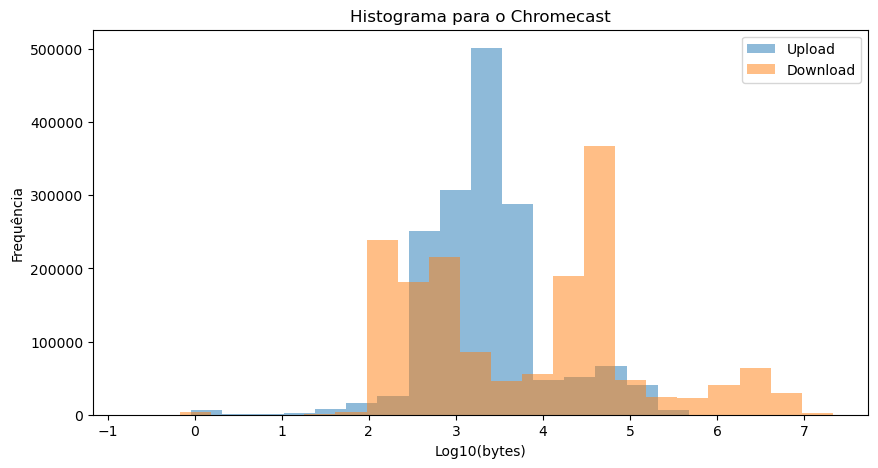

In [101]:
# Histograma para o Chromecast
plt.figure(figsize=(10, 5))
plt.hist(chromecast_df['bytes_up_log10'], bins=bins_chromecast, alpha=0.5, label='Upload')
plt.hist(chromecast_df['bytes_down_log10'], bins=bins_chromecast, alpha=0.5, label='Download')  
plt.title('Histograma para o Chromecast')
plt.xlabel('Log10(bytes)')
plt.ylabel('Frequência')
plt.legend()
plt.show()

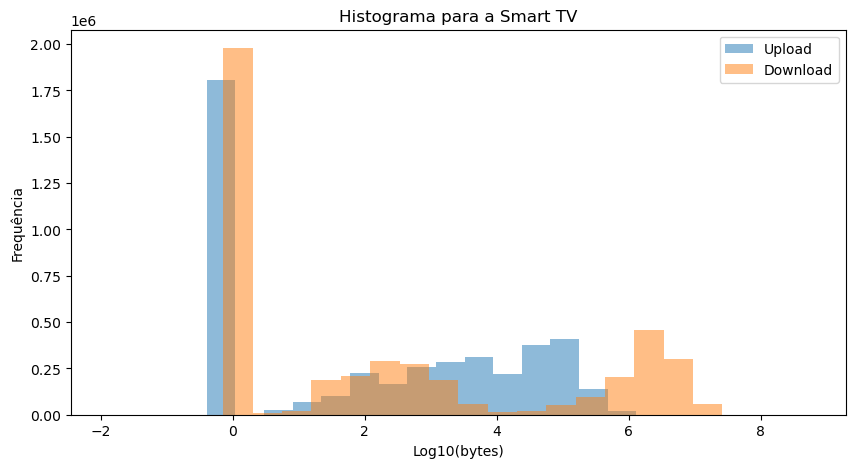

In [102]:
# Histograma para a Smart TV
plt.figure(figsize=(10, 5))
plt.hist(smarttv_df['bytes_up_log10'], bins=bins_smarttv, alpha=0.5, label='Upload')
plt.hist(smarttv_df['bytes_down_log10'], bins=bins_smarttv, alpha=0.5, label='Download')
plt.title('Histograma para a Smart TV')
plt.xlabel('Log10(bytes)')
plt.ylabel('Frequência')
plt.legend()
plt.show()

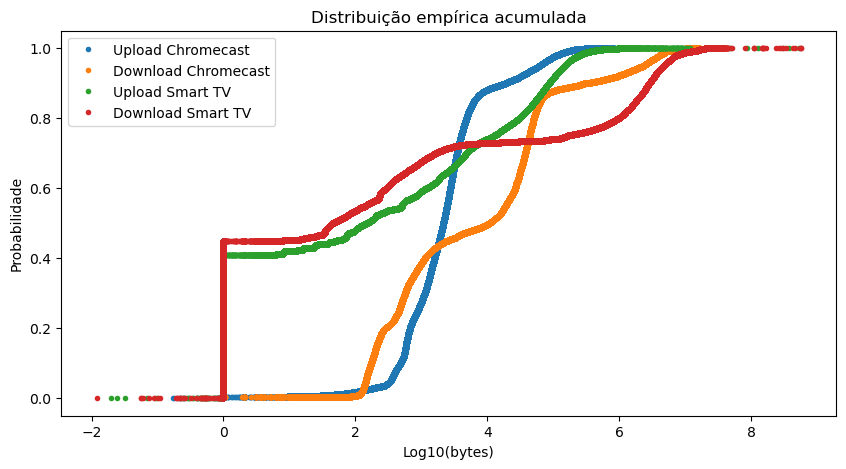

In [103]:
# Função distribuição empírica acumulada	
def ecdf(data):
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x, y)

# Distribuição empírica acumulada para o Chromecast
x_chromecast_up, y_chromecast_up = ecdf(chromecast_df['bytes_up_log10'])
x_chromecast_down, y_chromecast_down = ecdf(chromecast_df['bytes_down_log10'])

# Distribuição empírica acumulada para a Smart TV
x_smarttv_up, y_smarttv_up = ecdf(smarttv_df['bytes_up_log10'])
x_smarttv_down, y_smarttv_down = ecdf(smarttv_df['bytes_down_log10'])

# Plotando as distribuições empíricas acumuladas
plt.figure(figsize=(10, 5))
plt.plot(x_chromecast_up, y_chromecast_up, marker='.', linestyle='none', label='Upload Chromecast')
plt.plot(x_chromecast_down, y_chromecast_down, marker='.', linestyle='none', label='Download Chromecast')
plt.plot(x_smarttv_up, y_smarttv_up, marker='.', linestyle='none', label='Upload Smart TV')
plt.plot(x_smarttv_down, y_smarttv_down, marker='.', linestyle='none', label='Download Smart TV')
plt.title('Distribuição empírica acumulada')
plt.xlabel('Log10(bytes)')
plt.ylabel('Probabilidade')
plt.legend()
plt.show()


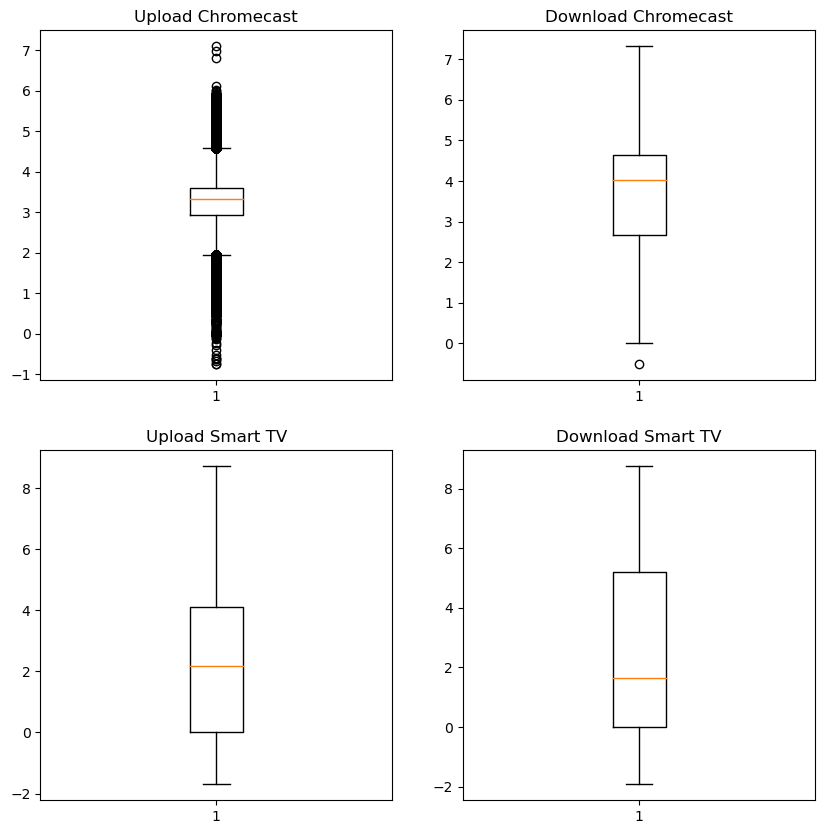

In [104]:
# Boxplot para os dados com 4 gráficos
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].boxplot(chromecast_df['bytes_up_log10'])
axes[0, 0].set_title('Upload Chromecast')
axes[0, 1].boxplot(chromecast_df['bytes_down_log10'])
axes[0, 1].set_title('Download Chromecast')
axes[1, 0].boxplot(smarttv_df['bytes_up_log10'])
axes[1, 0].set_title('Upload Smart TV')
axes[1, 1].boxplot(smarttv_df['bytes_down_log10'])
axes[1, 1].set_title('Download Smart TV')
plt.show()

In [105]:
media_chromecast_up = chromecast_df['bytes_up_log10'].mean()
media_chromecast_down = chromecast_df['bytes_down_log10'].mean()
media_smarttv_up = smarttv_df['bytes_up_log10'].mean()
media_smarttv_down = smarttv_df['bytes_down_log10'].mean()

mediana_chromecast_up = chromecast_df['bytes_up_log10'].median()
mediana_chromecast_down = chromecast_df['bytes_down_log10'].median()
mediana_smarttv_up = smarttv_df['bytes_up_log10'].median()
mediana_smarttv_down = smarttv_df['bytes_down_log10'].median()

variancia_chromecast_up = chromecast_df['bytes_up_log10'].var()
variancia_chromecast_down = chromecast_df['bytes_down_log10'].var()
variancia_smarttv_up = smarttv_df['bytes_up_log10'].var()
variancia_smarttv_down = smarttv_df['bytes_down_log10'].var()

dp_chromecast_up = chromecast_df['bytes_up_log10'].std()
dp_chromecast_down = chromecast_df['bytes_down_log10'].std()
dp_smarttv_up = smarttv_df['bytes_up_log10'].std()
dp_smarttv_down = smarttv_df['bytes_down_log10'].std()

print("Estatíticas para o Chromecast:")
print("Média upload: ", media_chromecast_up)
print("Média download: ", media_chromecast_down)
print("Mediana upload: ", mediana_chromecast_up)
print("Mediana download: ", mediana_chromecast_down)
print("Variância upload: ", variancia_chromecast_up)
print("Variância download: ", variancia_chromecast_down)
print("Desvio padrão upload: ", dp_chromecast_up)
print("Desvio padrão download: ", dp_chromecast_down)

print("Estatíticas para a Smart TV:")
print("Média upload: ", media_smarttv_up)
print("Média download: ", media_smarttv_down)
print("Mediana upload: ", mediana_smarttv_up)
print("Mediana download: ", mediana_smarttv_down)
print("Variância upload: ", variancia_smarttv_up)
print("Variância download: ", variancia_smarttv_down)
print("Desvio padrão upload: ", dp_smarttv_up)
print("Desvio padrão download: ", dp_smarttv_down)

Estatíticas para o Chromecast:
Média upload:  3.3496717251158694
Média download:  3.799335488086478
Mediana upload:  3.3322768318966562
Mediana download:  4.025004857901128
Variância upload:  0.46160016892850364
Variância download:  1.665979814323106
Desvio padrão upload:  0.6794116343782344
Desvio padrão download:  1.290728404554229
Estatíticas para a Smart TV:
Média upload:  2.1565902037563727
Média download:  2.350172639895904
Mediana upload:  2.161567631970461
Mediana download:  1.6497743962864664
Variância upload:  4.11308275233283
Variância download:  6.723920763451529
Desvio padrão upload:  2.028073655549233
Desvio padrão download:  2.5930524027584805


### Estatísticas por Horário

In [106]:
# Adicionando coluna de hora
chromecast_df["hour"] = pd.to_datetime(chromecast_df["date_hour"]).dt.hour
smarttv_df["hour"] = pd.to_datetime(smarttv_df["date_hour"]).dt.hour

In [107]:
def plot_estatisticas_por_hora(df, title):
    fig, axes = plt.subplots(2, 1, figsize=(10, 6))
    
    # Download
    df.groupby('hour')['bytes_down_log10'].mean().plot(ax=axes[0], label='Média')
    df.groupby('hour')['bytes_down_log10'].var().plot(ax=axes[0], label='Mediana')
    df.groupby('hour')['bytes_down_log10'].std().plot(ax=axes[0], label='Variância')

    axes[0].set_title(title + ' - Download')
    axes[0].set_xlabel('Hora')
    axes[0].set_ylabel('Log10(bytes)')
    axes[0].legend()

    # Upload
    df.groupby('hour')['bytes_up_log10'].mean().plot(ax=axes[1], label='Média')
    df.groupby('hour')['bytes_up_log10'].var().plot(ax=axes[1], label='Mediana')
    df.groupby('hour')['bytes_up_log10'].std().plot(ax=axes[1], label='Variância')

    axes[1].set_title(title + ' - Upload')
    axes[1].set_xlabel('Hora')
    axes[1].set_ylabel('Log10(bytes)')
    axes[1].legend()

    plt.tight_layout()
    plt.show()
    

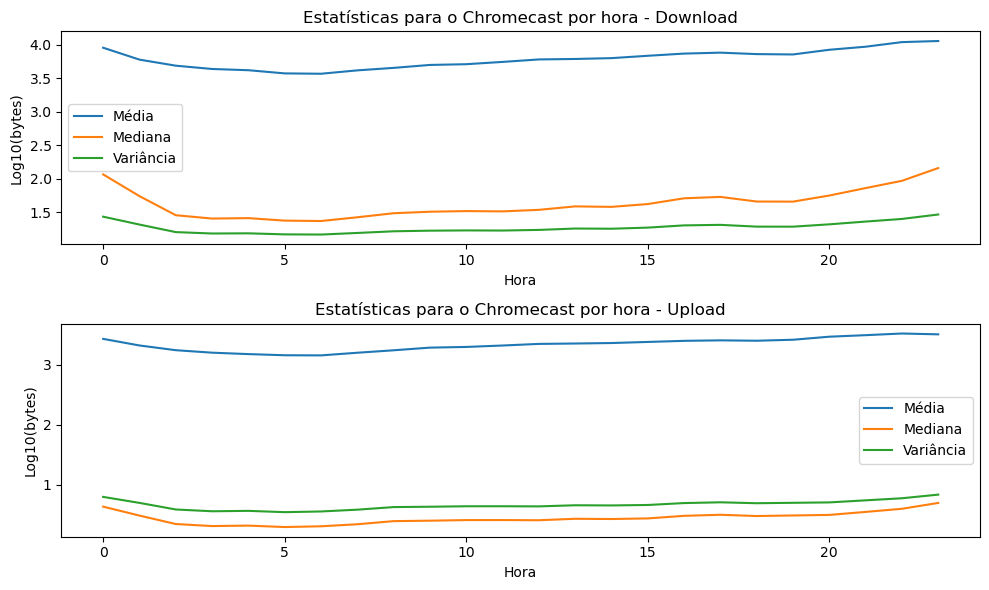

In [108]:
plot_estatisticas_por_hora(chromecast_df, 'Estatísticas para o Chromecast por hora')

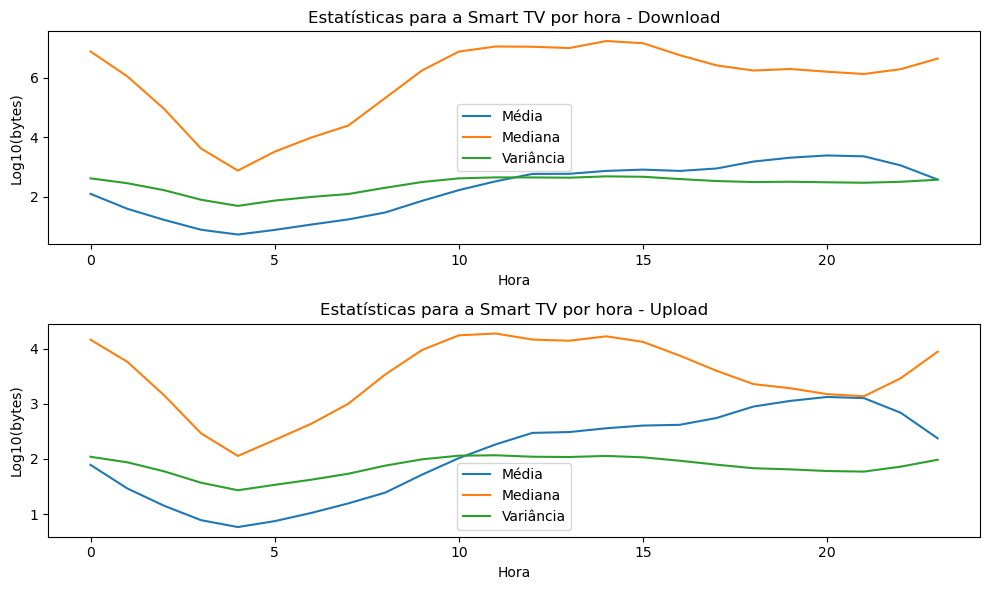

In [109]:
plot_estatisticas_por_hora(smarttv_df, 'Estatísticas para a Smart TV por hora')

In [110]:
def boxplot_por_hora(df, title):
    fig, axes = plt.subplots(2, 1, figsize=(10, 10))
    
    # Download
    df.boxplot(column='bytes_down_log10', by='hour', ax=axes[0])
    axes[0].set_title(title + ' - Download')
    axes[0].set_xlabel('Hora')
    axes[0].set_ylabel('Log10(bytes)')
    
    # Upload
    df.boxplot(column='bytes_up_log10', by='hour', ax=axes[1])
    axes[1].set_title(title + ' - Upload')
    axes[1].set_xlabel('Hora')
    axes[1].set_ylabel('Log10(bytes)')
    
    # Remover linhas guiadas
    plt.suptitle('')    
    plt.tight_layout()
    plt.show()

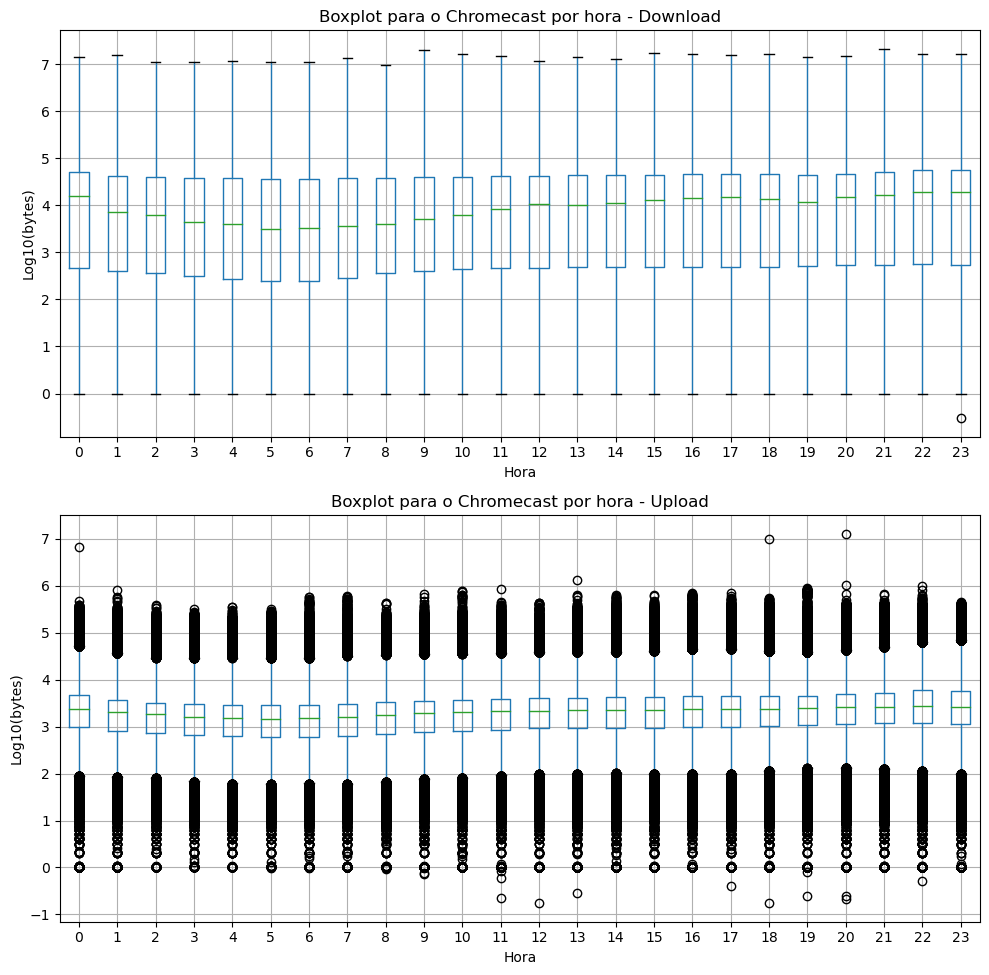

In [111]:
boxplot_por_hora(chromecast_df, 'Boxplot para o Chromecast por hora')

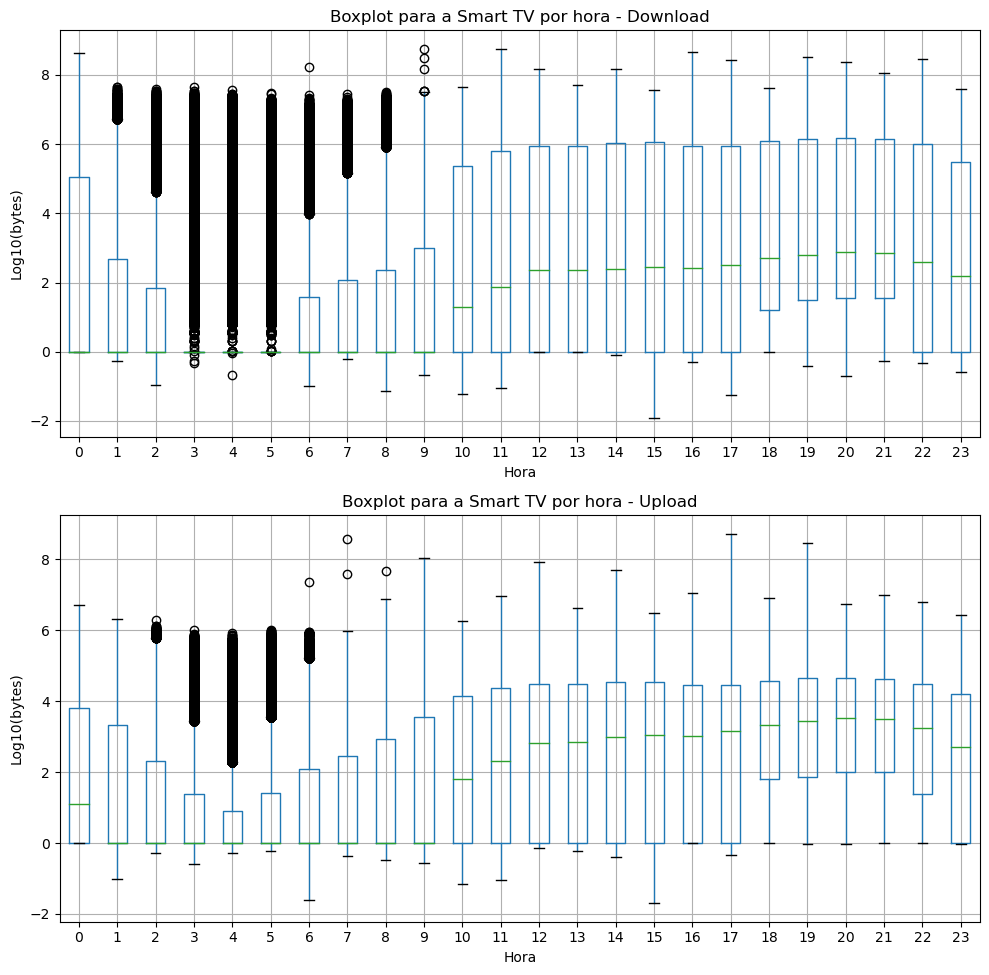

In [112]:
boxplot_por_hora(smarttv_df, 'Boxplot para a Smart TV por hora')

### Tráfego por Horário

In [113]:
def media_hora(df):
    # Retorna a hora com a maior média de bytes_up e bytes_down
    media_up = df.groupby('hour')['bytes_up_log10'].mean()
    media_down = df.groupby('hour')['bytes_down_log10'].mean()
    return media_up.idxmax(), media_down.idxmax()

print("Hora com maior média de bytes_up e bytes_down para o Chromecast: ", media_hora(chromecast_df))
print("Hora com maior média de bytes_up e bytes_down para a Smart TV: ", media_hora(smarttv_df))

Hora com maior média de bytes_up e bytes_down para o Chromecast:  (22, 23)
Hora com maior média de bytes_up e bytes_down para a Smart TV:  (20, 20)


obs: Para o chromecast, o tráfego de download é diferente do tráfego de upload, por isso, usaremos como maior hora de tráfego a hora de download.

In [114]:
def plot_histograma_da_hora(df, hour, title):
    plt.figure(figsize=(10, 5))
    plt.hist(df[df['hour'] == hour]['bytes_up_log10'], bins=bins_chromecast, alpha=0.5, label='Upload')
    plt.hist(df[df['hour'] == hour]['bytes_down_log10'], bins=bins_chromecast, alpha=0.5, label='Download')  
    plt.title(title)
    plt.xlabel('Log10(bytes)')
    plt.ylabel('Frequência')
    plt.legend()
    plt.show()

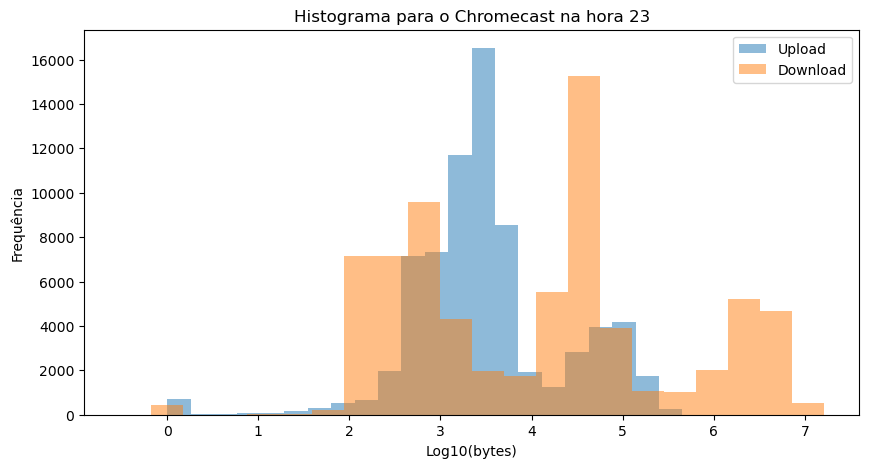

In [115]:
plot_histograma_da_hora(chromecast_df, 23, 'Histograma para o Chromecast na hora 23')

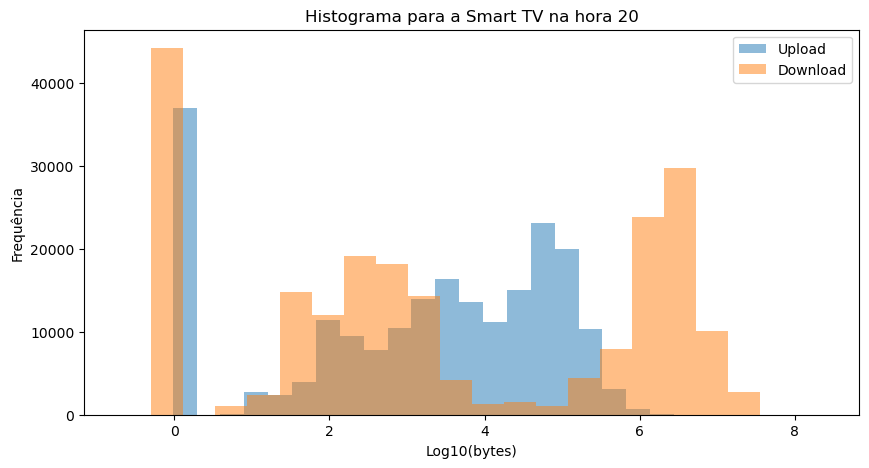

In [120]:
plot_histograma_da_hora(smarttv_df, 20, 'Histograma para a Smart TV na hora 20')

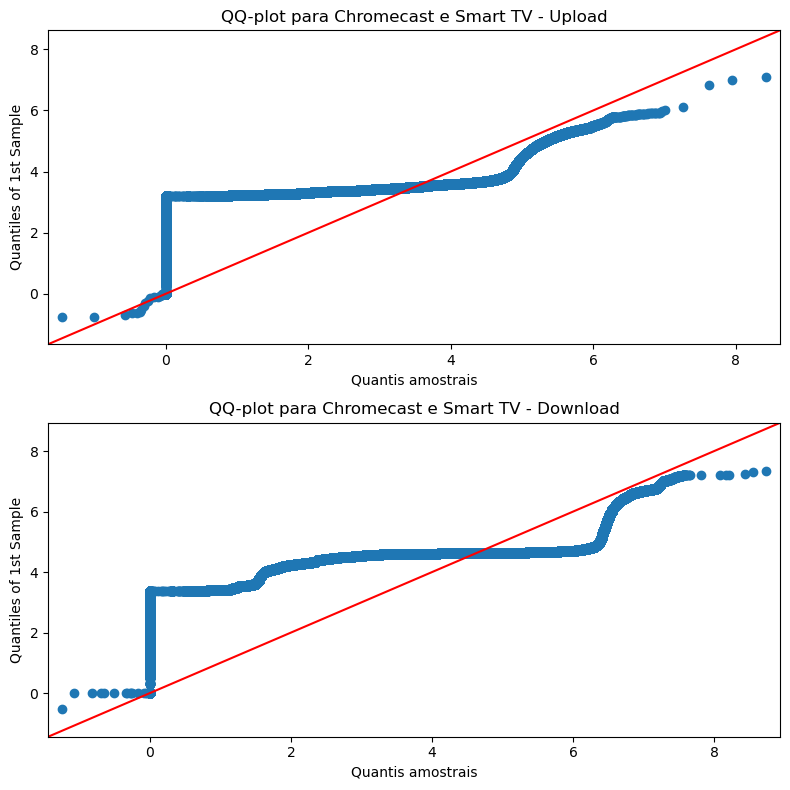

In [117]:
import statsmodels.api as sm

def qq_plot(df1, df2, title):
    fig, axes = plt.subplots(2, 1, figsize=(8, 8))
    # upload
    sm.qqplot_2samples(df1['bytes_up_log10'], df2['bytes_up_log10'], line='45', ax=axes[0])
    axes[0].set_title(title + ' - Upload')
    axes[0].set_xlabel('Quantis amostrais')

    # download
    sm.qqplot_2samples(df1['bytes_down_log10'], df2['bytes_down_log10'], line='45', ax=axes[1])
    axes[1].set_title(title + ' - Download')
    axes[1].set_xlabel('Quantis amostrais')
    
    plt.tight_layout()
    plt.show()

qq_plot(chromecast_df, smarttv_df, 'QQ-plot para Chromecast e Smart TV')

### Análise de Correlação

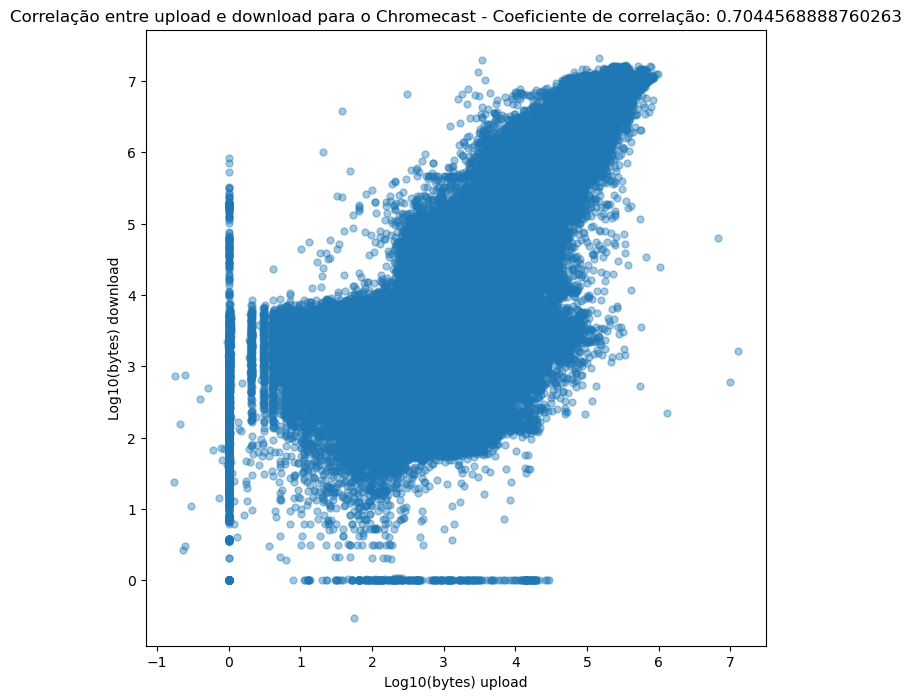

In [118]:
def correlacao_up_down(df, title):
    coef_corr = df['bytes_up_log10'].corr(df['bytes_down_log10'])

    plt.figure(figsize=(8, 8))
    plt.scatter(df['bytes_up_log10'], df['bytes_down_log10'], alpha=0.4, label='Upload', marker='.', s=100)
    plt.title(title + ' - Coeficiente de correlação: ' + str(coef_corr))
    plt.xlabel('Log10(bytes) upload')
    plt.ylabel('Log10(bytes) download')
    plt.show()

correlacao_up_down(chromecast_df, 'Correlação entre upload e download para o Chromecast')

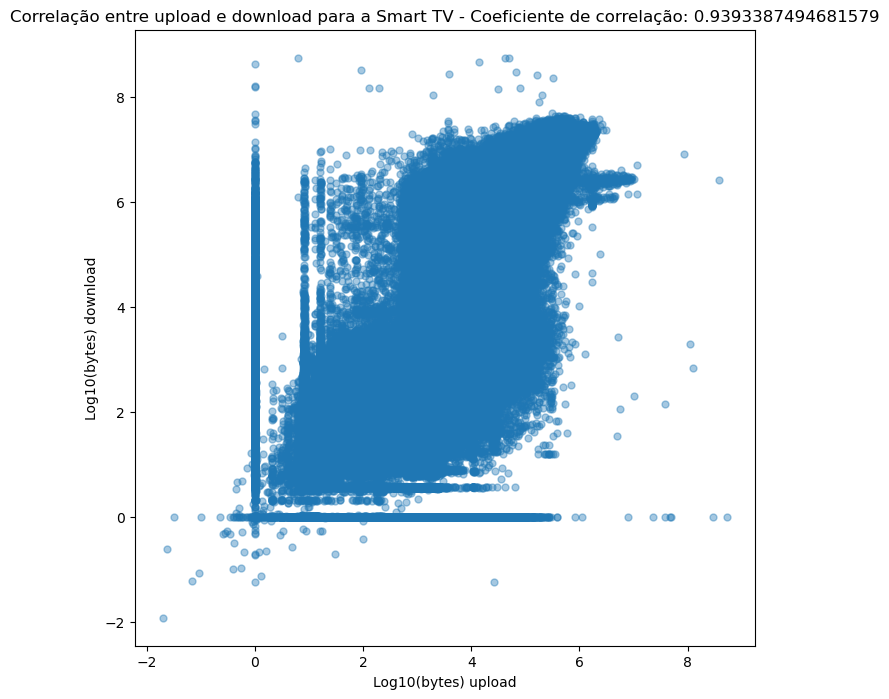

In [119]:
correlacao_up_down(smarttv_df, 'Correlação entre upload e download para a Smart TV')